Project --- > Import Libraries ---> Data Inspection ---> Data Cleaning ---> Summary Statistics ----> EDA Analysis ---> Binary Classification

In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [164]:
import pandas as pd
import numpy as np

In [165]:
data = pd.read_csv('/kaggle/input/online-food-dataset/onlinefoods.csv')

In [166]:
data.head(10) # First 10 rows

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [167]:
data.tail(10) # Last 10 rows

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
378,23,Female,Single,Employee,25001 to 50000,Post Graduate,2,12.9847,77.5491,560100,Yes,Positive,Yes
379,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
380,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
381,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [169]:
# Check missing data

data.isna().any()

Age                           False
Gender                        False
Marital Status                False
Occupation                    False
Monthly Income                False
Educational Qualifications    False
Family size                   False
latitude                      False
longitude                     False
Pin code                      False
Output                        False
Feedback                      False
Unnamed: 12                   False
dtype: bool

In [170]:
missing_values = data.iloc[:, :10].isnull().sum()

missing_values

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
dtype: int64

In [171]:
# There is no missing value in this data 

In [172]:
# I has deleted column Unnamed: 12 but the code i suddenly deleted

In [173]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [175]:
# Summary Statistic

In [177]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [178]:
print(data.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


In [179]:
data["Age"].value_counts(sort=True)

Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64

In [180]:
data["Gender"].value_counts(sort=True)

Gender
Male      222
Female    166
Name: count, dtype: int64

In [181]:
data["Marital Status"].value_counts(sort=True)

Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

In [182]:
data["Occupation"].value_counts(sort=True)

Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

In [183]:
data["Monthly Income"].value_counts(sort=True)

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [184]:
data["Educational Qualifications"].value_counts(sort=True)

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

In [185]:
data["Family size"].value_counts(sort=True)

Family size
3    117
2    101
4     63
5     54
6     29
1     24
Name: count, dtype: int64

In [186]:
data["latitude"].value_counts(sort=True)

latitude
12.9770    36
12.9783    16
12.9850    14
12.8845    12
12.9369    11
           ..
13.0496     1
12.9537     1
12.9983     1
12.9565     1
12.9719     1
Name: count, Length: 77, dtype: int64

In [187]:
data["Pin code"].value_counts(sort=True)

Pin code
560009    36
560038    16
560010    14
560076    12
560095    11
          ..
560073     1
560047     1
560033     1
560026     1
560072     1
Name: count, Length: 77, dtype: int64

In [189]:
data["Output"].value_counts(sort=True)

Output
Yes    301
No      87
Name: count, dtype: int64

In [188]:
data["Feedback"].value_counts(sort=True)

Feedback
Positive     317
Negative      71
Name: count, dtype: int64

In [190]:
agg_data = data[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']].agg(['min', 'mean', 'max'])

In [191]:
agg_data

,Age,Family size,latitude,longitude,Pin code
min,18.000000,1.000000,12.865200,77.48420,560001.000000
mean,24.628866,3.280928,12.972058,77.60016,560040.113402
max,33.000000,6.000000,13.102000,77.75820,560109.000000


In [192]:
percentiles_data = data[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']].quantile([0.25, 0.5, 0.75])

In [193]:
percentiles_data

,Age,Family size,latitude,longitude,Pin code
0.25,23.0,2.0,12.936900,77.565275,560010.75
0.50,24.0,3.0,12.977000,77.592100,560033.50
0.75,26.0,4.0,12.997025,77.630900,560068.00


In [194]:
# Calculating standard deviation for the selected columns using the `.std()` method
std_data = data[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']].std()

In [195]:
std_data

Age             2.975593
Family size     1.351025
latitude        0.044489
longitude       0.051354
Pin code       31.399609
dtype: float64

In [196]:
# Data Visualization

In [197]:
# Distribution Age And Family Siza

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


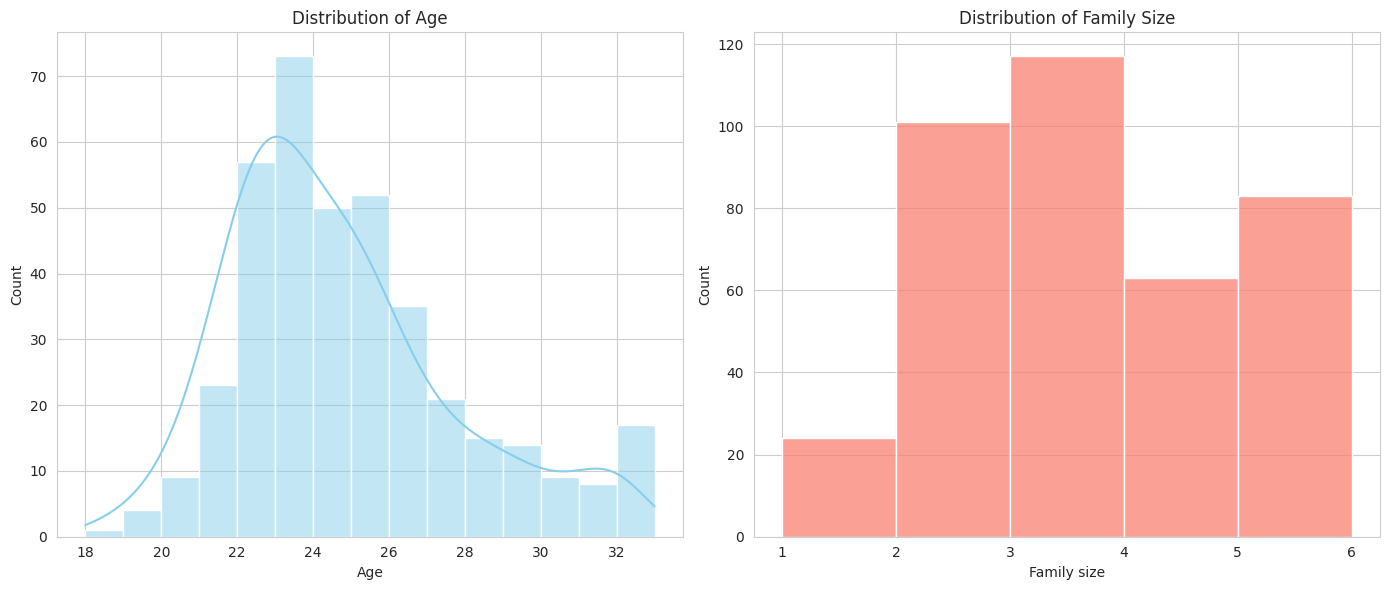

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(14, 6))

# Plot distributions of Age and Family size
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(data['Family size'], bins=range(1, data['Family size'].max() + 1), kde=False, color='salmon')
plt.title('Distribution of Family Size')

plt.tight_layout()
plt.show()

In [199]:
# Online Food Ordering By Gender, Marital Status, Occupation, Monthly Income, Educational Qualifications.

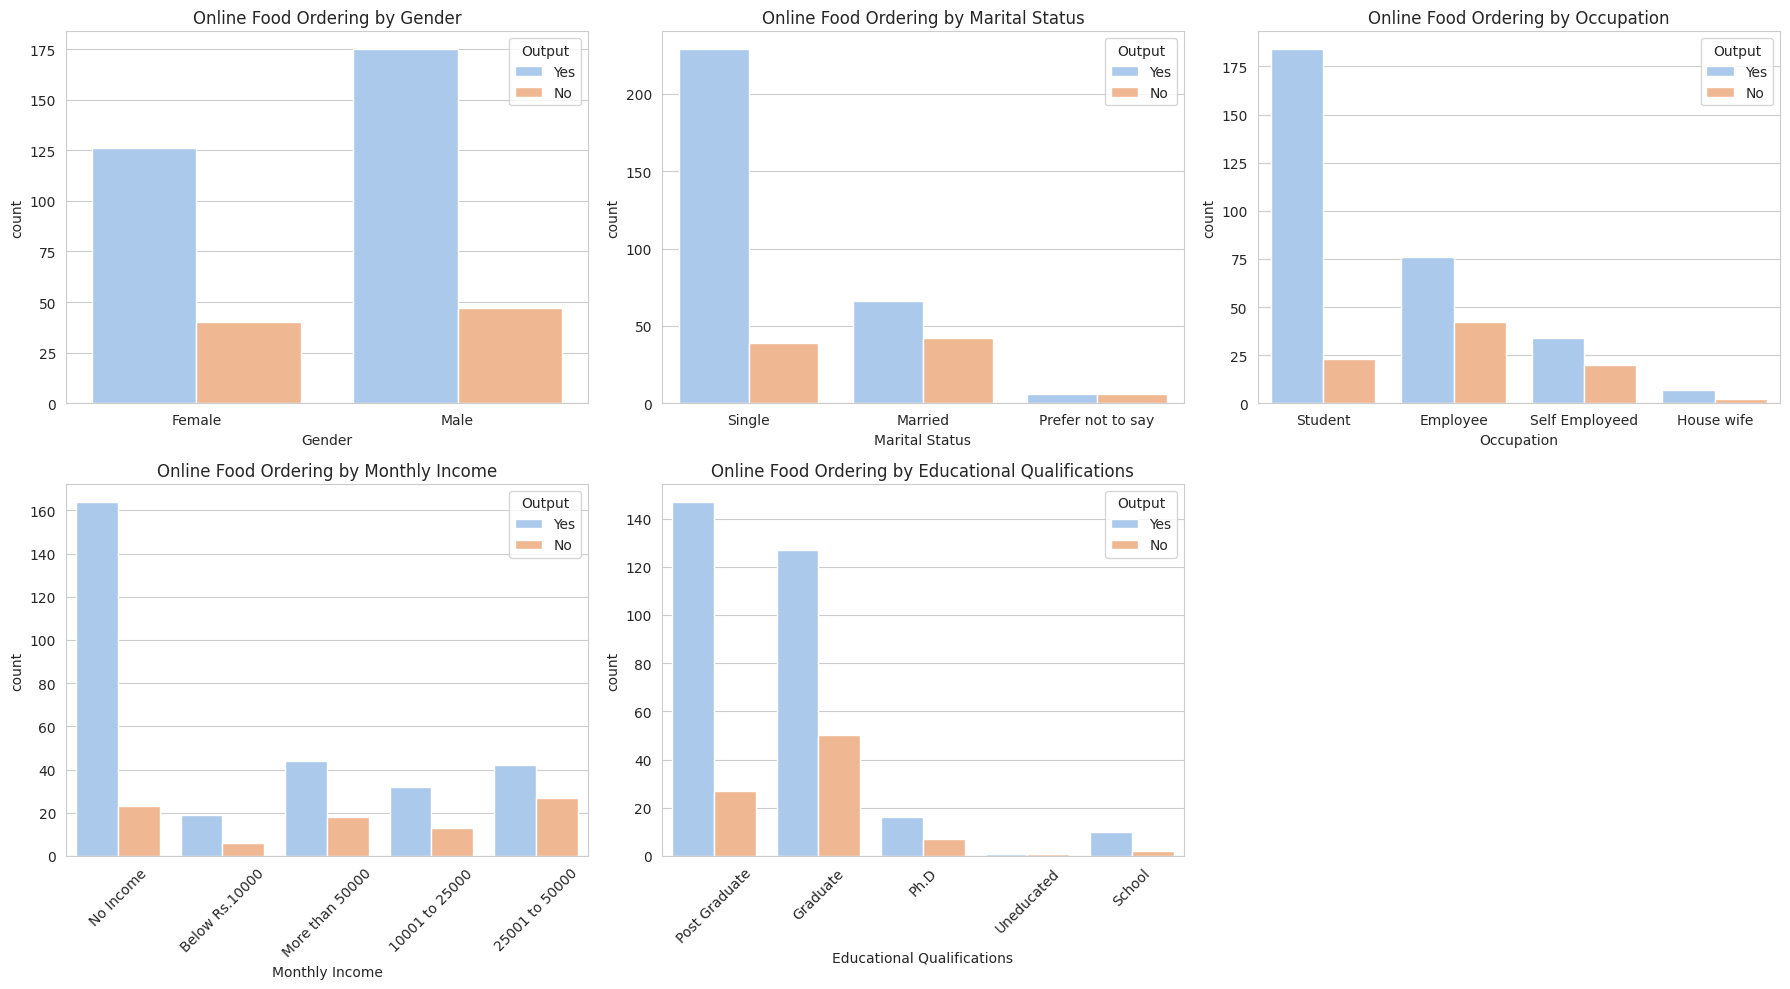

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('/kaggle/input/online-food-dataset/onlinefoods.csv')

# Initialize the figure
plt.figure(figsize=(18, 10))

# Gender vs Output
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', hue='Output', data=data, palette='pastel')
plt.title('Online Food Ordering by Gender')

# Marital Status vs Output
plt.subplot(2, 3, 2)
sns.countplot(x='Marital Status', hue='Output', data=data, palette='pastel')
plt.title('Online Food Ordering by Marital Status')

# Occupation vs Output
plt.subplot(2, 3, 3)
sns.countplot(x='Occupation', hue='Output', data=data, palette='pastel')
plt.title('Online Food Ordering by Occupation')

# Monthly Income vs Output
plt.subplot(2, 3, 4)
sns.countplot(x='Monthly Income', hue='Output', data=data, palette='pastel')
plt.xticks(rotation=45)
plt.title('Online Food Ordering by Monthly Income')

# Educational Qualifications vs Output
plt.subplot(2, 3, 5)
sns.countplot(x='Educational Qualifications', hue='Output', data=data, palette='pastel')
plt.xticks(rotation=45)
plt.title('Online Food Ordering by Educational Qualifications')

plt.tight_layout()
plt.show()

In [204]:
print(data.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


In [201]:
# Binary Classification

In [212]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/kaggle/input/online-food-dataset/onlinefoods.csv')

# Encoding categorical variables to numeric
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Feedback':  # Exclude the target variable if it's categorical
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))  # Convert NaN to string and encode
        label_encoders[column] = le

# Handling missing numerical values by replacing them with the median
for column in data.select_dtypes(include=[np.number]).columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].median(), inplace=True)

# Split Data into Training and Test Sets

X = data.drop('Feedback', axis=1).values  # Features as numpy array
y = data['Feedback'].values  # Target variable as numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [214]:
# Choose and Train a Model - use a logistic regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8589743589743589
